# Assignment 3 - Diabetes.csv
Tom Steinman

# Import dependencies

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [11]:
data = pd.read_csv('diabetes.csv')
print(data.shape)
data.head(10)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [12]:
# Check for null values
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [13]:
data.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [15]:
# Check for unique values
data.columns.unique()

# Print unique values for each column in the DataFrame
for column in data.columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())

Unique values in Pregnancies:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]
Unique values in Glucose:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]
Unique values in BloodPressure:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]
Unique values in SkinThickness:
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10

In [16]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Remove impossible outliers

In [17]:
# Remove rows with impossible zero values from the diabetes dataset
# Extreme outliers were not removed, but impossible values were removed

# Identify columns where zero is physiologically impossible
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

# Create a copy of the original dataframe
data_cleaned = data.copy()

# Print the shape before filtering
print("Original dataset shape:", data.shape)

# Remove rows where any of these columns have zero values
for col in cols_with_zeros:
    # Filter out rows with zeros in this column
    data_cleaned = data_cleaned[data_cleaned[col] != 0]
    # Print how many rows were removed for each column
    print(f"Rows removed due to zeros in {col}: {data.shape[0] - data_cleaned.shape[0]}")
    # Update our count for the next iteration
    data = data_cleaned.copy()

# Print the shape after filtering
print("Cleaned dataset shape:", data_cleaned.shape)

# Save the cleaned dataframe
data_cleaned.to_csv('diabetes_cleaned.csv', index=False)

# Create a new dataframe from the cleaned data
df = data_cleaned.copy()

# Print summary statistics of the cleaned dataframe
print("\nSummary statistics of cleaned dataframe:")
print(df.describe())

# Verify that no zeros remain in the target columns
for col in cols_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"Count of zeros in {col}: {zero_count}")

Original dataset shape: (768, 9)
Rows removed due to zeros in Glucose: 5
Rows removed due to zeros in BloodPressure: 35
Rows removed due to zeros in SkinThickness: 194
Rows removed due to zeros in BMI: 2
Rows removed due to zeros in Insulin: 140
Cleaned dataset shape: (392, 9)

Summary statistics of cleaned dataframe:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   392.000000  392.000000     392.000000     392.000000  392.000000   
mean      3.301020  122.627551      70.663265      29.145408  156.056122   
std       3.211424   30.860781      12.496092      10.516424  118.841690   
min       0.000000   56.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      62.000000      21.000000   76.750000   
50%       2.000000  119.000000      70.000000      29.000000  125.500000   
75%       5.000000  143.000000      78.000000      37.000000  190.000000   
max      17.000000  198.000000     110.000000      63.000000  846.000000

# 1a)
set a seed (to ensure work reproducibility) and take a random sample of 25 observations and find the mean Glucose and highest Glucose values of this sample and compare these statistics with the population statistics of the same variable. You should use charts for this comparison.
(5 points)

## Set seed and get samples

In [18]:
# Set seed for reproducibility
np.random.seed(42)

# Get 25 samples using indices
sample_indices = np.random.choice(df.index, size=25, replace=False)
sample_df = df.loc[sample_indices]
sample_df.count()

,0
Pregnancies,25
Glucose,25
BloodPressure,25
SkinThickness,25
Insulin,25
BMI,25
DiabetesPedigreeFunction,25
Age,25
Outcome,25


## Sample and Population mean and max Glucose

In [32]:
sample_mean_glucose = sample_df['Glucose'].mean()
sample_max_glucose = sample_df['Glucose'].max()
pop_mean_glucose = df['Glucose'].mean()
pop_max_glucose = df['Glucose'].max()

print(f'25 Sample Glucose Mean : {sample_mean_glucose:.2f}')
print(f'25 Sample Glucose Max : {sample_max_glucose:.2f}')
print(f'Population Glucose Mean : {pop_mean_glucose:.2f}')
print(f'Population Glucose Max : {pop_max_glucose:.2f}')

25 Sample Glucose Mean : 120.88
25 Sample Glucose Max : 181.00
Population Glucose Mean : 122.63
Population Glucose Max : 198.00


## Create charts for mean and max Glucose

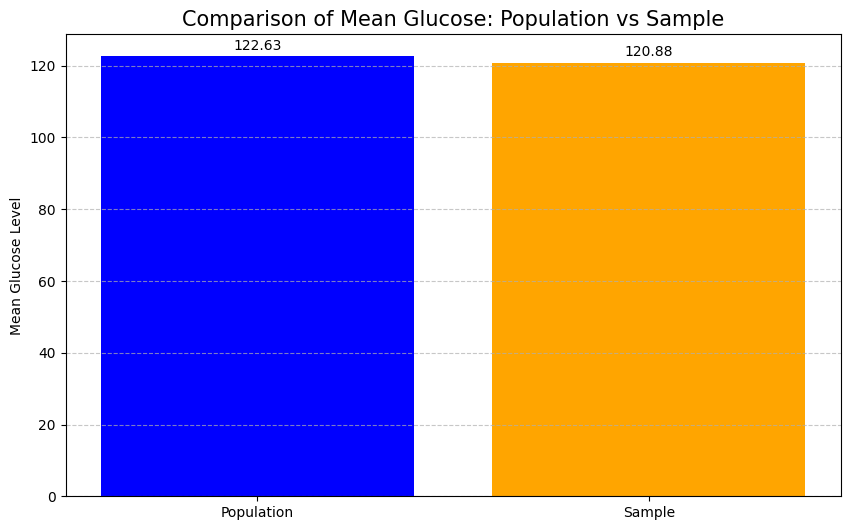

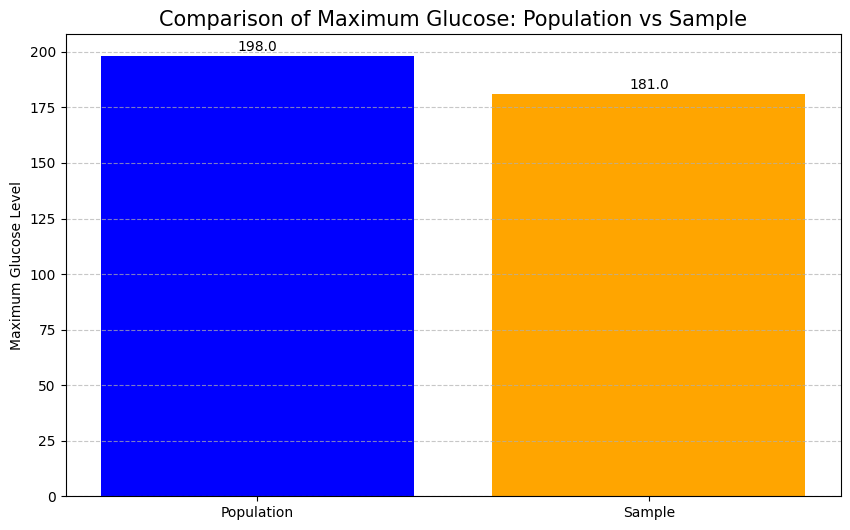

In [20]:
# Create a comparison bar chart for mean Glucose
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Sample'], [pop_mean_glucose, sample_mean_glucose], color=['blue', 'orange'])
plt.title('Comparison of Mean Glucose: Population vs Sample', fontsize=15)
plt.ylabel('Mean Glucose Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.2f}', ha='center', va='bottom')

plt.savefig('mean_glucose_comparison.png')
plt.show()
plt.close()

# Create a comparison bar chart for max Glucose
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Sample'], [pop_max_glucose, sample_max_glucose], color=['blue', 'orange'])
plt.title('Comparison of Maximum Glucose: Population vs Sample', fontsize=15)
plt.ylabel('Maximum Glucose Level')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}', ha='center', va='bottom')

plt.savefig('max_glucose_comparison.png')
plt.show()
plt.close()

## Show the mean and max in comparison to the distribution

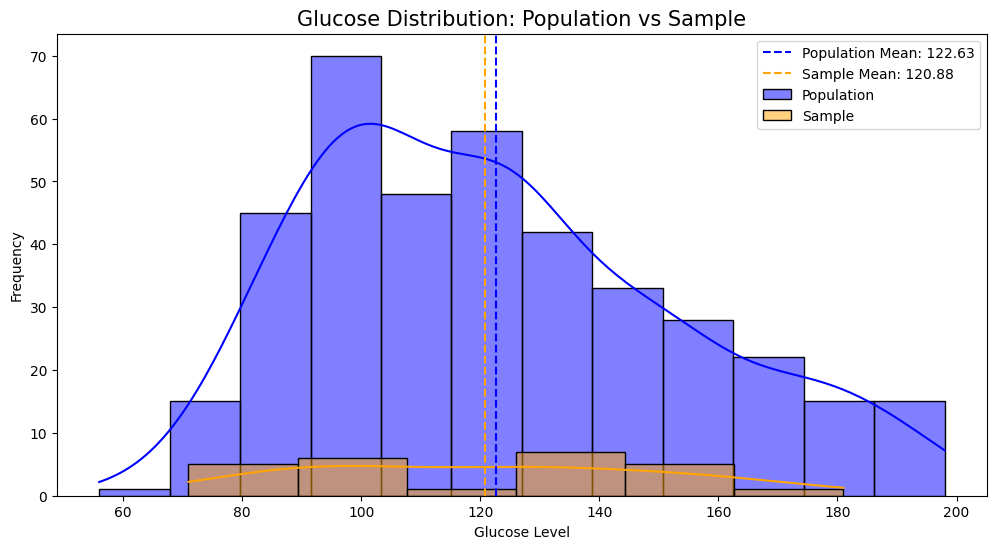

In [21]:
# Distribution comparison
plt.figure(figsize=(12, 6))
sns.histplot(df['Glucose'], kde=True, color='blue', alpha=0.5, label='Population')
sns.histplot(sample_df['Glucose'], kde=True, color='orange', alpha=0.5, label='Sample')
plt.axvline(pop_mean_glucose, color='blue', linestyle='--', label=f'Population Mean: {pop_mean_glucose:.2f}')
plt.axvline(sample_mean_glucose, color='orange', linestyle='--', label=f'Sample Mean: {sample_mean_glucose:.2f}')
plt.title('Glucose Distribution: Population vs Sample', fontsize=15)
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('glucose_distribution.png')
plt.show()
plt.close()

# 1b)
Find the 98th percentile of BMI of your sample and the population and compare the results using charts. (5 points)

In [22]:
# Get 98th percentile of BMI for sample and population
pop_bmi_98th = np.percentile(df['BMI'], 98)
sample_bmi_98th = np.percentile(sample_df['BMI'], 98)

# Print the results
print(f'Population 98th percentile BMI: {pop_bmi_98th:.2f}')
print(f'Sample 98th percentile BMI: {sample_bmi_98th:.2f}')

Population 98th percentile BMI: 47.00
Sample 98th percentile BMI: 49.07


## Create chart for 98th percentile of BMI for population and sample

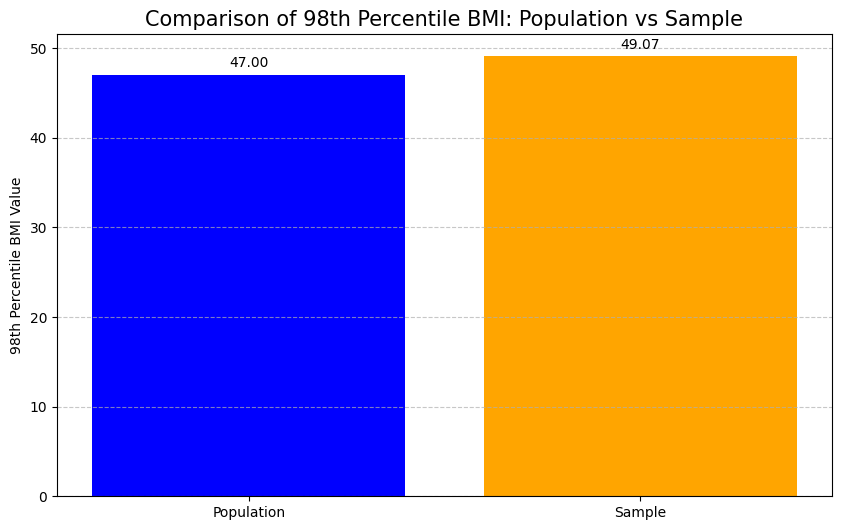

In [23]:
# Create a comparison bar chart for BMI 98th percentile
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Sample'], [pop_bmi_98th, sample_bmi_98th], color=['blue', 'orange'])
plt.title('Comparison of 98th Percentile BMI: Population vs Sample', fontsize=15)
plt.ylabel('98th Percentile BMI Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.2f}', ha='center', va='bottom')

plt.savefig('bmi_98th_percentile_comparison.png')
plt.show()
plt.close()

## Show the 98th percentile of population in sample in comparison to the distribution

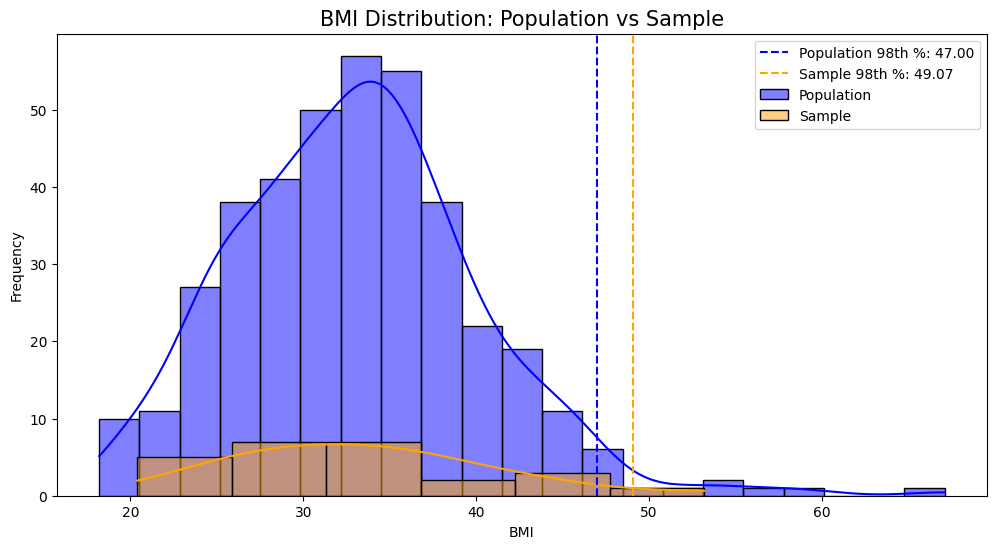

In [24]:
# Distribution comparison for BMI
plt.figure(figsize=(12, 6))
sns.histplot(df['BMI'], kde=True, color='blue', alpha=0.5, label='Population')
sns.histplot(sample_df['BMI'], kde=True, color='orange', alpha=0.5, label='Sample')
plt.axvline(pop_bmi_98th, color='blue', linestyle='--', label=f'Population 98th %: {pop_bmi_98th:.2f}')
plt.axvline(sample_bmi_98th, color='orange', linestyle='--', label=f'Sample 98th %: {sample_bmi_98th:.2f}')
plt.title('BMI Distribution: Population vs Sample', fontsize=15)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bmi_distribution.png')
plt.show()
plt.close()

# 1c)
Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the population and find the average mean, standard deviation and percentile for BloodPressure and compare this with these statistics from the population for the same variable. Again, you should create charts for this comparison. Report on your findings. (10 points

## Population average mean, standard deviation, and percentiles (50th and 98th) for BloodPressure

In [25]:
# Population mean, std, percentiles
pop_bp_mean = df['BloodPressure'].mean()
pop_bp_std= df['BloodPressure'].std()
pop_bp_median = df['BloodPressure'].median() # 50th percentile
pop_bp_98th = np.percentile(df['BloodPressure'], 98) # 98th percentile

print(f'Population Blood Pressure mean: {pop_bp_mean:.2f}')
print(f'Population Blood Pressure std: {pop_bp_std:.2f}')
print(f'Population Blood Pressure median: {pop_bp_median:.2f}')
print(f'Population Blood Pressure 98th percentile: {pop_bp_mean:.2f}')

Population Blood Pressure mean: 70.66
Population Blood Pressure std: 12.50
Population Blood Pressure median: 70.00
Population Blood Pressure 98th percentile: 70.66


## Create 500 samples (of 150 observations each)

In [26]:
# Initialize arrays to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_medians = [] # 50th percentile
bootstrap_98th = [] # 98th percentile

# Create 500 bootstrap samples with replacement
for i in range(500):
    # Generate bootstrap sample indices
    bootstrap_indices = np.random.choice(df.index, size=150, replace=True)
    bootstrap_sample = df.loc[bootstrap_indices]

    # Calculate statistics for each bootstrap sample
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_medians.append(np.median(bootstrap_sample['BloodPressure'])) # for 50th percentile
    bootstrap_98th.append(np.percentile(bootstrap_sample['BloodPressure'], 98))

# Calculate average bootstrap statistics
avg_bootstrap_mean = np.mean(bootstrap_means)
avg_bootstrap_std = np.mean(bootstrap_stds)
avg_bootstrap_median = np.mean(bootstrap_medians)
avg_bootstrap_98th = np.percentile(bootstrap_98th, 98)

# Print bootstrap results
print(f'Average Bootstrap Mean BloodPressure: {avg_bootstrap_mean:.2f}')
print(f'Average Bootstrap Std BloodPressure: {avg_bootstrap_std:.2f}')
print(f'Average Bootstrap Median BloodPressure: {avg_bootstrap_median:.2f}')
print(f'Average Bootstrap 98th Percentile BloodPressure: {avg_bootstrap_98th:.2f}')

Average Bootstrap Mean BloodPressure: 70.71
Average Bootstrap Std BloodPressure: 12.46
Average Bootstrap Median BloodPressure: 70.73
Average Bootstrap 98th Percentile BloodPressure: 106.08


## Create charts to compare population and bootstrap sample metrics

## Blood Pressure means

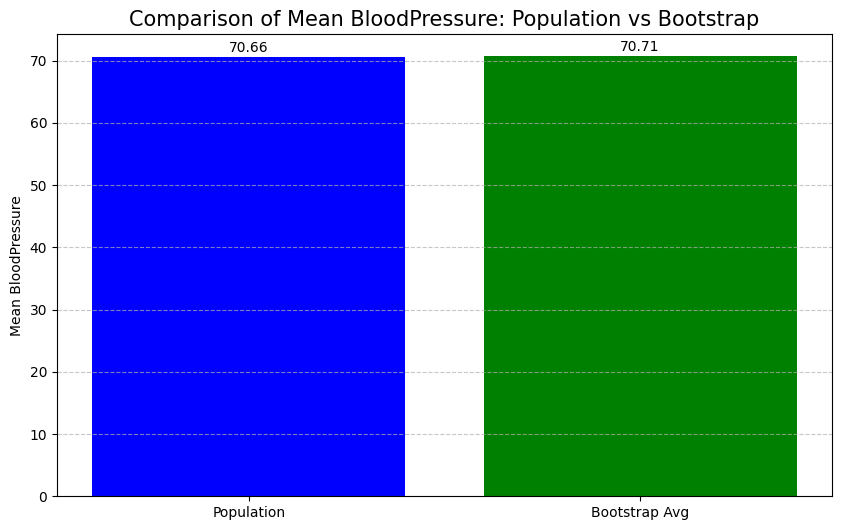

In [27]:
# Create comparison charts for BloodPressure mean
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Bootstrap Avg'], [pop_bp_mean, avg_bootstrap_mean], color=['blue', 'green'])
plt.title('Comparison of Mean BloodPressure: Population vs Bootstrap', fontsize=15)
plt.ylabel('Mean BloodPressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{height:.2f}', ha='center', va='bottom')

plt.savefig('mean_bp_comparison.png')
plt.show()
plt.close()

## Blood Pressure standard deviation

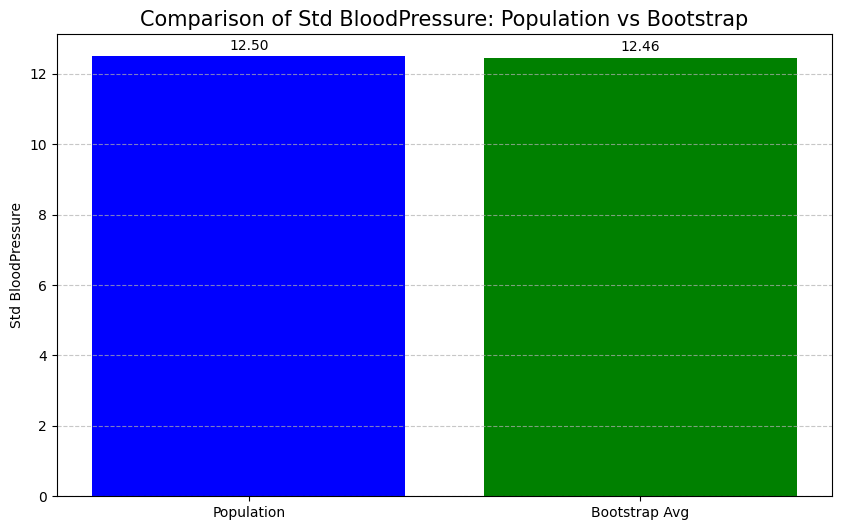

In [28]:

# Create comparison chart for BloodPressure standard deviation
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Bootstrap Avg'], [pop_bp_std, avg_bootstrap_std], color=['blue', 'green'])
plt.title('Comparison of Std BloodPressure: Population vs Bootstrap', fontsize=15)
plt.ylabel('Std BloodPressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{height:.2f}', ha='center', va='bottom')

plt.savefig('std_bp_comparison.png')
plt.show()
plt.close()

## Blood Pressure 50th Percentile (median)

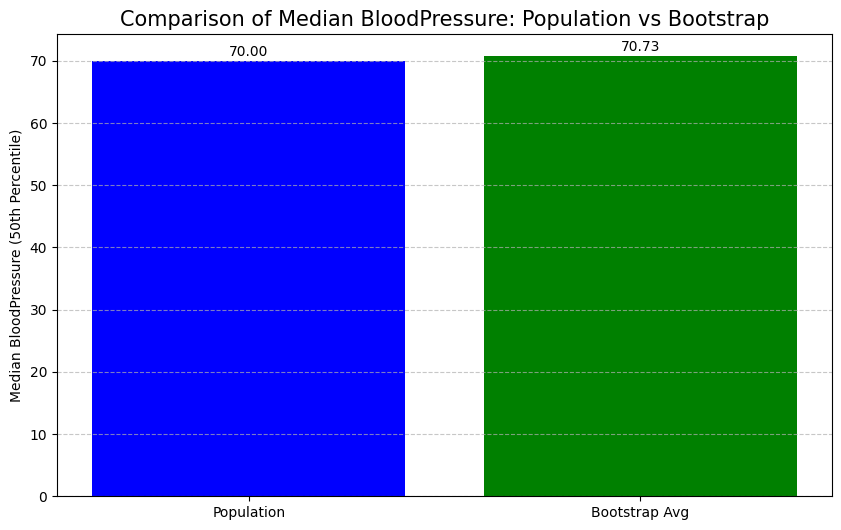

In [29]:
# Create comparison chart for BloodPressure median (50th percentile)
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Bootstrap Avg'], [pop_bp_median, avg_bootstrap_median], color=['blue', 'green'])
plt.title('Comparison of Median BloodPressure: Population vs Bootstrap', fontsize=15)
plt.ylabel('Median BloodPressure (50th Percentile)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{height:.2f}', ha='center', va='bottom')

plt.savefig('median_bp_comparison.png')
plt.show()
plt.close()

## Blood Pressure 98th Percentile

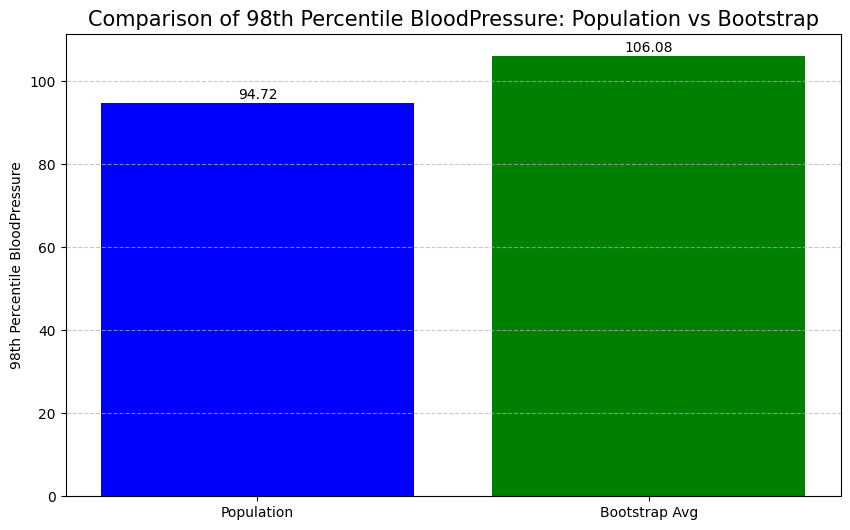

In [30]:
# Create comparison chart for BloodPressure 98th percentile
plt.figure(figsize=(10, 6))
bars = plt.bar(['Population', 'Bootstrap Avg'], [pop_bp_98th, avg_bootstrap_98th], color=['blue', 'green'])
plt.title('Comparison of 98th Percentile BloodPressure: Population vs Bootstrap', fontsize=15)
plt.ylabel('98th Percentile BloodPressure')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{height:.2f}', ha='center', va='bottom')

plt.savefig('98th_percentile_bp_comparison.png')
plt.show()
plt.close()

## Distributions

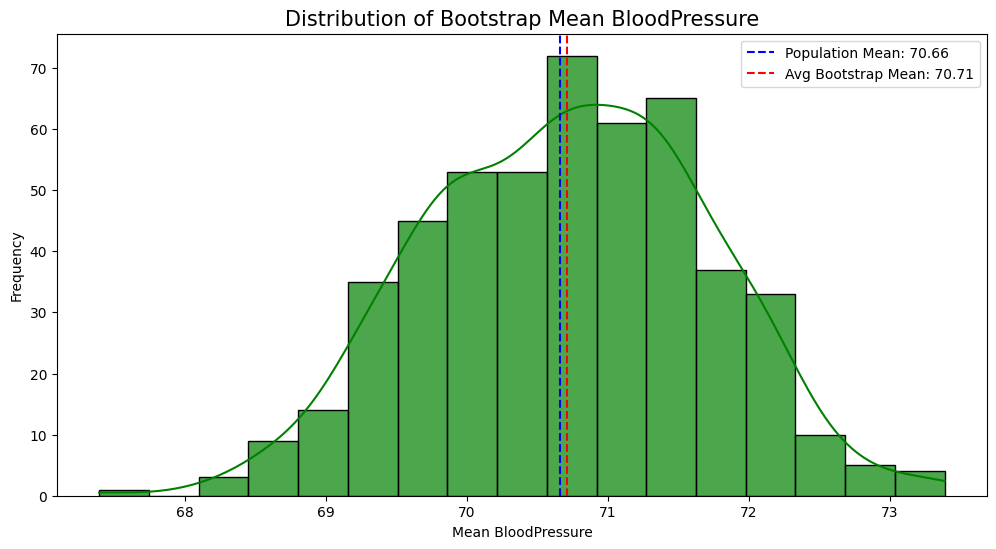

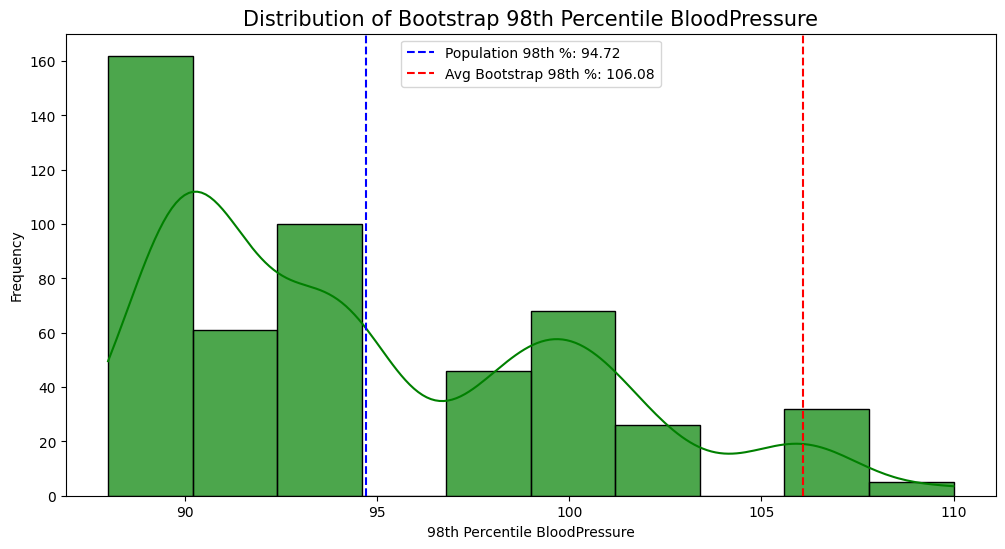


Comparison of BloodPressure Statistics:
            Statistic  Population  Bootstrap Average  Difference
0                Mean   70.663265          70.706867   -0.043601
1  Standard Deviation   12.496092          12.456017    0.040075
2              Median   70.000000          70.732000   -0.732000
3     98th Percentile   94.720000         106.080000  -11.360000


In [31]:
# Distribution of bootstrap means
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_means, kde=True, color='green', alpha=0.7)
plt.axvline(pop_bp_mean, color='blue', linestyle='--', label=f'Population Mean: {pop_bp_mean:.2f}')
plt.axvline(avg_bootstrap_mean, color='red', linestyle='--', label=f'Avg Bootstrap Mean: {avg_bootstrap_mean:.2f}')
plt.title('Distribution of Bootstrap Mean BloodPressure', fontsize=15)
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bootstrap_means_distribution.png')
plt.show()
plt.close()

# Distribution of bootstrap 98th percentiles
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_98th, kde=True, color='green', alpha=0.7)
plt.axvline(pop_bp_98th, color='blue', linestyle='--', label=f'Population 98th %: {pop_bp_98th:.2f}')
plt.axvline(avg_bootstrap_98th, color='red', linestyle='--', label=f'Avg Bootstrap 98th %: {avg_bootstrap_98th:.2f}')
plt.title('Distribution of Bootstrap 98th Percentile BloodPressure', fontsize=15)
plt.xlabel('98th Percentile BloodPressure')
plt.ylabel('Frequency')
plt.legend()
plt.savefig('bootstrap_98th_percentile_distribution.png')
plt.show()
plt.close()

# Create results table for easy comparison
results_table = pd.DataFrame({
    'Statistic': ['Mean', 'Standard Deviation', 'Median', '98th Percentile'],
    'Population': [pop_bp_mean, pop_bp_std, pop_bp_median, pop_bp_98th],
    'Bootstrap Average': [avg_bootstrap_mean, avg_bootstrap_std, avg_bootstrap_median, avg_bootstrap_98th],
    'Difference': [pop_bp_mean - avg_bootstrap_mean,
                   pop_bp_std - avg_bootstrap_std,
                   pop_bp_median - avg_bootstrap_median,
                   pop_bp_98th - avg_bootstrap_98th]
})

print("\nComparison of BloodPressure Statistics:")
print(results_table)

# Report Findings

##

Data Cleaning
The dataset had some impossible 0 values in the Glucose, BloodPressure, SkinThickness, BMI and Insulin columns that were removed.  No null values were found.

1a)
	There is very little difference in sample and population Glucose mean, with the population being 122.63 versus the sample mean of 120.88.  The max has a larger gap with the population being 198.00 versus the sample at 181.00.  There is an outlier within the population that did not get included in the sample.  The distributions were similar, with less samples in the sample of the population at the outliers and center of the distribution.

1b)
	The 98th percentile of BMI for the population and sample were also similar.  The population had a 98th percentile of 47.00, while the sample was 49.07.  The distribution between the two were also similar, with less outliers and higher observations in the sample compared to the population.

1c)
	The bootstrap averages of BloodPressure mean, standard deviation and median (50th percentile) were all very similar.  The 98th percentile bootstrapping average was pretty significant at 106.08 versus the population at 94.72.  While the bootstrapping method had excellent accuracy in sampling the population of mean, standard deviation and median, it was not as accurate in estimating the 98th percentile, and likely high percentiles, of the population.  The distribution of the bootstrapping method however is accurate outside of the higher percentile to demonstrate the observations of the population.
